In [2]:
#importing all the needed packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import blackman

Samplerate: 44100
Samples: 346112
Length (in seconds): 7.8483


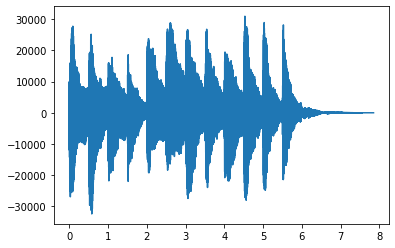

In [3]:
#importing raw data
samplerate, data = wavfile.read("Test 1.wav")
#samplerate, data = wavfile.read("440-519Hz.wav")
data = data.transpose()
print("Samplerate: {}".format(samplerate))
samples = len(data[0])
print("Samples: {}".format(samples))

#calculating length (in seconds) of audio file
length = samples / samplerate
print("Length (in seconds): {:.4f}".format(length))

#plotting audio file
time = np.linspace(0,length,samples)
plt.plot(time,data[0])

We need a function of determing how many slices to cut an audio file into, the function should always overestimate how many notes there are so that it doesn't miss any. 

In [4]:
bpm = 180 #most music doesn't go over 180 bpm and we'll take that for granted for now
notelength = 16 #most music doesn't use intervals shorter than a 16th note and ...
nps = bpm/60 * notelength #how many possible notes per second

tps = int(length * nps) # total possible notes
print("Hypothetical max number of notes: {}".format(tps))

Hypothetical max number of notes: 376


"bpm" and "notelength" are set values for now but hypothetically we could ask the user to specify these to allow for a more accurate estimation. We can also make our "tps" function more sophisticated but that will probably be done in the form of manuel fine tuning and can subsequently be left for later

Length (in seconds): 7.8483
Number of Samples: 376
Samples per second: 48.00


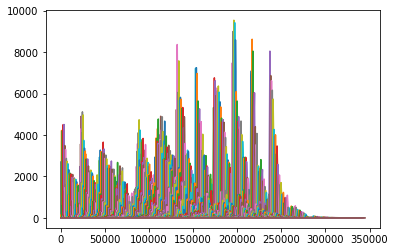

In [5]:
#Running FFT / Plotting Data according to our new function

section = int(samples / tps) #length of audio file subdivisions
section_w = blackman(section) #window for reducing spectral leakage

notes = [] #creating an array to hold all the data for the notes

#filling notes array
for i in range(tps): 
    ft = fft(data[0][section*i:(i+1)*section]*section_w) 
    notes.append(ft)
    

#Plotting notes array
for i in range(len(notes)):
    xfn = np.linspace(i*section,(i+1)*section/(2*samplerate),section//2)
    plt.plot(xfn, 2.0/section * np.abs(notes[i][0:section//2]))
    
print("Length (in seconds): {:.4f}".format(length))
print("Number of Samples: {}".format(tps))
print("Samples per second: {:.2f}".format(nps))


Our next goal is to figure out when each note stops and ends

(0, 376)

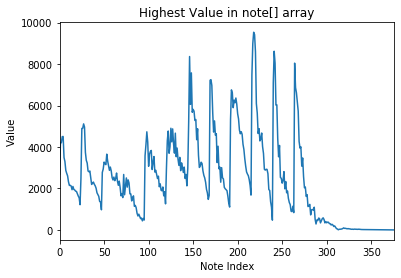

In [6]:
highest = []

for i in range(tps): #finds the highest value in a note[] array
    high = 0
    for j in range(len(notes[i][0:section//2])):
        x = 2.0/section * np.abs(notes[i][j:j+1])
        high = high * (high >= x) + x * (x > high)
    highest.append(high)
    
#plotting highest values
x = np.arange(0,len(highest),1)
plt.plot(x,highest)
plt.title("Highest Value in note[] array")
plt.xlabel("Note Index")
plt.ylabel("Value")
plt.xlim(0,tps)

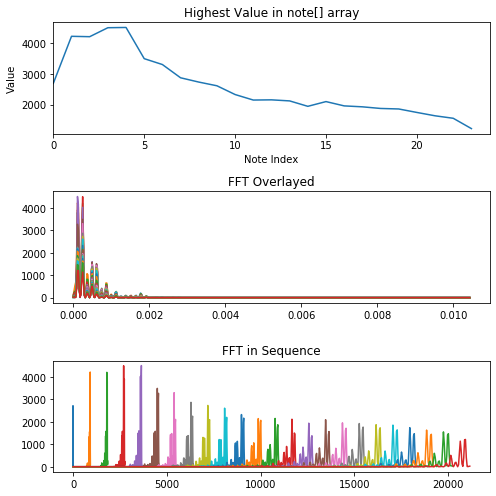

In [7]:
fig1, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(7,7))

#Highest Value
highest = []

N = 24
for i in range(N): #finds the highest value in a note[] array
    high = 0
    for j in range(len(notes[i][0:section//2])):
        x = 2.0/section * np.abs(notes[i][j:j+1])
        high = high * (high >= x) + x * (x > high)
    highest.append(high)
    
#plotting 
x = np.arange(0,len(highest),1)
ax0.plot(x,highest)
ax0.set_title("Highest Value in note[] array")
ax0.set_xlabel("Note Index")
ax0.set_ylabel("Value")
ax0.set_xlim(0,N)

#overlaying 
xn = np.linspace(0,section/(2*samplerate),section//2)

for i in range(N):
    ax1.plot(xn, 2.0/section * np.abs(notes[i][0:section//2]))
ax1.set_title("FFT Overlayed")
    
#sequencing
for i in range(N):
    xfn = np.linspace(i*section,(i+1)*section/(2*samplerate),section//2)
    ax2.plot(xfn, 2.0/section * np.abs(notes[i][0:section//2]))
    
ax2.set_title("FFT in Sequence")

fig1.tight_layout()

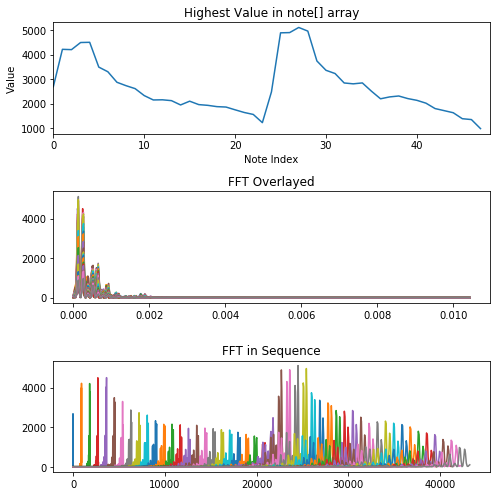

In [8]:
fig1, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(7,7))

#Highest Value
highest = []

N = 48
for i in range(N): #finds the highest value in a note[] array
    high = 0
    for j in range(len(notes[i][0:section//2])):
        x = 2.0/section * np.abs(notes[i][j:j+1])
        high = high * (high >= x) + x * (x > high)
    highest.append(high)
    
#plotting 
x = np.arange(0,len(highest),1)
ax0.plot(x,highest)
ax0.set_title("Highest Value in note[] array")
ax0.set_xlabel("Note Index")
ax0.set_ylabel("Value")
ax0.set_xlim(0,N)

#overlaying 
xn = np.linspace(0,section/(2*samplerate),section//2)

for i in range(N):
    ax1.plot(xn, 2.0/section * np.abs(notes[i][0:section//2]))
ax1.set_title("FFT Overlayed")
    
#sequencing
for i in range(N):
    xfn = np.linspace(i*section,(i+1)*section/(2*samplerate),section//2)
    ax2.plot(xfn, 2.0/section * np.abs(notes[i][0:section//2]))
    
ax2.set_title("FFT in Sequence")

fig1.tight_layout()

The fft overlay graph is pretty useless at the moment, I want to change it so that it is only graphing 2 FFT's instead of 48, these 2 FFT's will be a combination of the 48

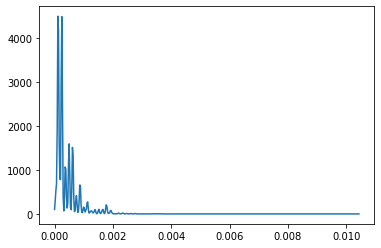

In [9]:
#Takes the overlayed graph and only plots the highest data
#Effectively makes the graph 1 color
N = 24
top = []

for i in range(len(notes[0][0:section//2])): #finds the highest value in a note[] array
    high = 0
    for j in range(N):
        x = 2.0/section * np.abs(notes[j][i])
        high = high * (high >= x) + x * (x > high)
    top.append(high)
    
plt.plot(xn,top)

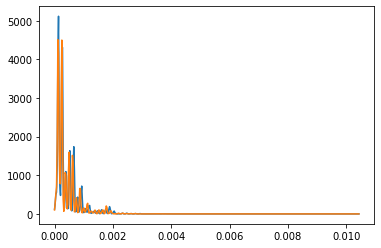

In [10]:
n = 2
N = 24
top = []

for k in range(n):
    tempTop = []
    for i in range(len(notes[0][0:section//2])): #finds the highest value in a note[] array
        high = 0
        for j in range(k*N,(k+1)*N):
            x = 2.0/section * np.abs(notes[j][i])
            high = high * (high >= x) + x * (x > high)
        tempTop.append(high)
    top.append(tempTop)   
    
xn = np.linspace(0,section/(2*samplerate),section//2)
plt.plot(xn,top[1])
plt.plot(xn,top[0])

That's a bit more legible, lets try with 3 notes now

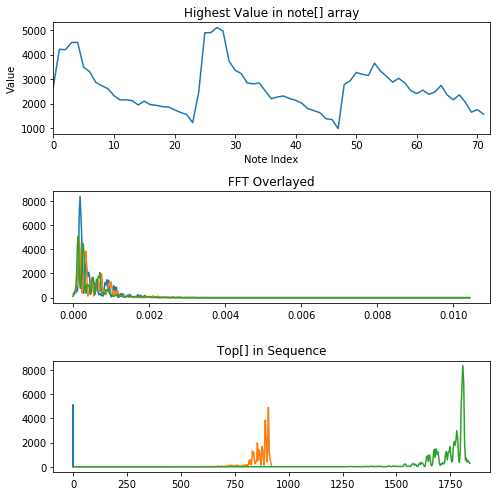

In [11]:
fig1, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(7,7))

#Highest Value
highest = []

n = 3
N = n*24
for i in range(N): #finds the highest value in a note[] array
    high = 0
    for j in range(len(notes[i][0:section//2])):
        x = 2.0/section * np.abs(notes[i][j:j+1])
        high = high * (high >= x) + x * (x > high)
    highest.append(high)
    
#plotting 
x = np.arange(0,len(highest),1)
ax0.plot(x,highest)
ax0.set_title("Highest Value in note[] array")
ax0.set_xlabel("Note Index")
ax0.set_ylabel("Value")
ax0.set_xlim(0,N)

#overlaying 

top = []
for k in range(n):
    tempTop = []
    for i in range(len(notes[0][0:section//2])): #finds the highest value in a note[] array
        high = 0
        for j in range(k*N,(k+1)*N):
            x = 2.0/section * np.abs(notes[j][i])
            high = high * (high >= x) + x * (x > high)
        tempTop.append(high)
    top.append(tempTop)   
    
for i in range(len(top)):
    ax1.plot(xn,top[n-i-1]) #plotting in reverse order to make it appear better on graph
ax1.set_title("FFT Overlayed")
    
#sequencing
for i in range(n):
    xfn = np.linspace(i*section,(i+1)*section/(2*samplerate),section//2)
    ax2.plot(xfn, top[i])
    
ax2.set_title("Top[] in Sequence")

fig1.tight_layout()

The final graph is looking similar to the sequenced graph from Normalizing Test 1, let's create a method for calculating "n" and the size of "N"

In [12]:
#shamelessly stolen from workshop 9
def forward_dy(y, x):
    '''
        Uses forward differences (see below) to estimate the derivatives at each value of x, 
        except for the last one. The derivative at the last value of x is estimated 
        using a backward difference.
            dy/dx at x[i] is approximated by (y[i+1] - y[i]) /  (x[i+1] - x[i])
    '''
    dyf = [0.0]*len(x)
    for i in range(len(y)-1):
        dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
    
    #set last element by backwards difference
    dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dyf

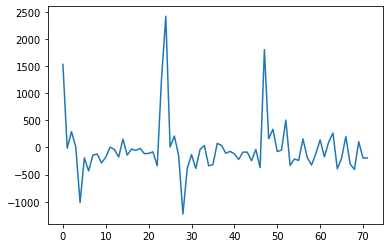

In [13]:
#Computing an experimental derrivative for highest[]
x = np.arange(0,N,1)
yf = forward_dy(highest,x)
plt.plot(x,yf)

In [14]:
n = 0
N = []

limit = 1000 #minimum accepted derrivative value to be a new note

x = 0
for i in range(len(yf)-1): #-1 is to prevent an out of bounds index,
    x +=1
    if (yf[i] >= limit) and (yf[i] >= yf[i+1]):
        n += 1 
        #x += 1 * (yf[i-1] < yf[i]) #accounts for 2 derrivatives being > limit back to back
        N.append(x)
        x = 0
        
N.append(x+1) #adds last note, +1 accounts for -1 in for loop
N.remove(N[0]) #removes 
print(N)
print(n)

[24, 23, 24]
3


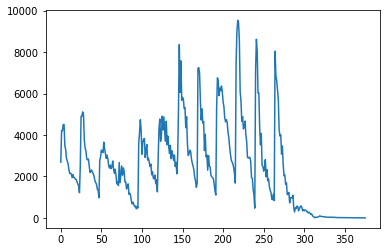

In [15]:
highest = []
for i in range(tps): #finds the highest value in a note[] array
    high = 0
    for j in range(len(notes[i][0:section//2])):
        x = 2.0/section * np.abs(notes[i][j:j+1])
        high = high * (high >= x) + x * (x > high)
    highest.append(high)
    
xh = np.arange(0,len(highest),1)
plt.plot(xh,highest)

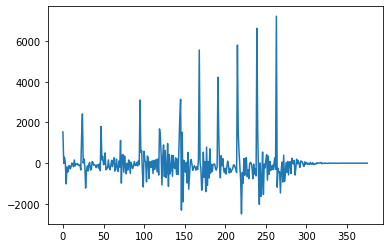

In [16]:
#Computing an experimental derrivative for highest[]
x = np.arange(0,len(highest),1)
yf = forward_dy(highest,x)
plt.plot(x,yf)

In [18]:
n = 0
N = []

limit = 1500 #minimum accepted derrivative value to be a new note

x = 0
for i in range(len(yf)-1): #-1 is to prevent an out of bounds index,
    x +=1
    if (yf[i] >= limit) and (yf[i] >= yf[i+1]):
        n += 1 
        #x += 1 * (yf[i-1] < yf[i]) #accounts for 2 derrivatives being > limit back to back
        N.append(x)
        x = 0
        
N.append(x+1) #adds last note, +1 accounts for -1 in for loop
N.remove(N[0]) #removes 
print(N)
print(n)

[24, 23, 48, 24, 26, 2, 21, 23, 24, 1, 23, 1, 23, 112]
14


limit can't be a fixed value, we need to define it relative to its surroundings

In [83]:
#Calculates a running average for index based on the 5 previous terms
index = 7
limit = np.ones(len(yf))

for i in range(index,len(yf)):
    avg = 0
    for j in range(index):
        avg += np.abs(yf[i-j])
    avg /= index
    limit[i] = avg
    
for i in range(index):
    limit[i] = limit[index+1] #sets the first 5 terms equal to the 6th

In [96]:
n = 1
N = []

x = 0
for i in range(len(yf)-1): #-1 is to prevent an out of bounds index,
    x +=1
    if (yf[i] >= limit[i]*2) and (yf[i] >= yf[i+1]) and (x > 3):
        n += 1 
        N.append(x)
        x = 0
N.append(x+1) #adds last note, +1 accounts for -1 in for loop
 #removes 
print(N)
print(n)

[25, 23, 24, 24, 24, 26, 23, 23, 24, 24, 24, 112]
12


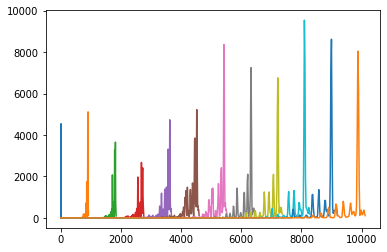

In [109]:
highest = []

for k in range(n):
    for i in range(N[k]): #finds the highest value in a note[] array
        high = 0
        for j in range(len(notes[i][0:section//2])):
            x = 2.0/section * np.abs(notes[i][j:j+1])
            high = high * (high >= x) + x * (x > high)
        highest.append(high)

top = []
index = 0
for k in range(n):
    tempTop = []
    for i in range(len(notes[0][0:section//2])): #finds the highest value in a note[] array
        high = 0
        for j in range(index,index+N[k]):
            x = 2.0/section * np.abs(notes[j][i])
            high = high * (high >= x) + x * (x > high)
        tempTop.append(high)
    top.append(tempTop)   
    index += N[k]
    
    
#sequencing
for i in range(n):
    xfn = np.linspace(i*section,(i+1)*section/(2*samplerate),section//2)
    plt.plot(xfn, top[i])

In [106]:
print(len(notes[0]))
print(len(notes))

920
376
